<a href="https://colab.research.google.com/github/tazar09/napoleon/blob/main/us_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
pd.set_option('display.max_rows', 100)
pd.options.display.max_rows = 100

In [21]:
# pip install autoscraper
# from autoscraper import AutoScraper

Scrape for the list of states of US.

In [22]:
url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'
df = pd.read_html(url)[1]

In [23]:
df = df.droplevel(axis = 1, level = 0)
df.columns = ['state',
       'abrev', 'capital', 'largest',
       'admission', 'population', 'total_mi2',
       'total_km2', 'land_mi2', 'land_km2', 'water_mi2', 'water_km2', 'representitives']
df['admission'] = pd.to_datetime(df['admission'])

In [24]:
df.head()

,state,abrev,capital,largest,admission,population,total_mi2,total_km2,land_mi2,land_km2,water_mi2,water_km2,representitives
0,Alabama,AL,Montgomery,Huntsville,1819-12-14,5024279,52420,135767,50645,131171,1775,4597,7
1,Alaska,AK,Juneau,Anchorage,1959-01-03,733391,665384,1723337,570641,1477953,94743,245384,1
2,Arizona,AZ,Phoenix,Phoenix,1912-02-14,7151502,113990,295234,113594,294207,396,1026,9
3,Arkansas,AR,Little Rock,Little Rock,1836-06-15,3011524,53179,137732,52035,134771,1143,2961,4
4,California,CA,Sacramento,Los Angeles,1850-09-09,39538223,163695,423967,155779,403466,7916,20501,52


Make a column which shows the order of the admission by date.

In [25]:
df['date_rank'] = df['admission'].rank(ascending = True).astype(int)
df['state_time_days'] = (dt.now() - df['admission']).dt.days
df['state_time_years'] = df['state_time_days']/365
df['state_time_years'] = df['state_time_years'].round(2)
df['density_land'] = (df['population'] / df['land_km2']).round(2)

In [26]:
df.head()

,state,abrev,capital,largest,admission,population,total_mi2,total_km2,land_mi2,land_km2,water_mi2,water_km2,representitives,date_rank,state_time_days,state_time_years,density_land
0,Alabama,AL,Montgomery,Huntsville,1819-12-14,5024279,52420,135767,50645,131171,1775,4597,7,22,74482,204.06,38.30
1,Alaska,AK,Juneau,Anchorage,1959-01-03,733391,665384,1723337,570641,1477953,94743,245384,1,49,23693,64.91,0.50
2,Arizona,AZ,Phoenix,Phoenix,1912-02-14,7151502,113990,295234,113594,294207,396,1026,9,48,40818,111.83,24.31
3,Arkansas,AR,Little Rock,Little Rock,1836-06-15,3011524,53179,137732,52035,134771,1143,2961,4,25,68454,187.55,22.35
4,California,CA,Sacramento,Los Angeles,1850-09-09,39538223,163695,423967,155779,403466,7916,20501,52,31,63255,173.30,98.00


In [30]:
df.sort_values(by = 'density_land', ascending = False)

,state,abrev,capital,largest,admission,population,total_mi2,total_km2,land_mi2,land_km2,water_mi2,water_km2,representitives,date_rank,state_time_days,state_time_years,density_land
29,New Jersey,NJ,Trenton,Newark,1787-12-18,9288994,8723,22591,7354,19047,1368,3544,12,3,86165,236.07,487.69
38,Rhode Island,RI,Providence,Providence,1790-05-29,1097379,1545,4001,1034,2678,511,1324,2,13,85272,233.62,409.78
20,Massachusetts[B],MA,Boston,Boston,1788-02-06,7029917,10554,27336,7800,20202,2754,7134,9,6,86115,235.93,347.98
6,Connecticut,CT,Hartford,Bridgeport,1788-01-09,3605944,5543,14357,4842,12542,701,1816,5,5,86143,236.01,287.51
19,Maryland,MD,Annapolis,Baltimore,1788-04-28,6177224,12406,32131,9707,25142,2699,6990,8,7,86033,235.71,245.69
7,Delaware,DE,Dover,Wilmington,1787-12-07,989948,2489,6446,1949,5047,540,1399,1,1,86176,236.10,196.15
31,New York,NY,Albany,New York City,1788-07-26,20201249,54555,141297,47126,122057,7429,19240,26,11,85944,235.46,165.51
8,Florida,FL,Tallahassee,Jacksonville,1845-03-03,21538187,65758,170312,53625,138887,12133,31424,28,27,65271,178.82,155.08
37,Pennsylvania[B],PA,Harrisburg,Philadelphia,1787-12-12,13002700,46054,119280,44743,115883,1312,3397,17,2,86171,236.08,112.21
34,Ohio,OH,Columbus,Columbus,1803-03-01,11799448,44826,116098,40861,105829,3965,10269,15,17,80614,220.86,111.50


<Axes: title={'center': 'Most dense states'}, ylabel='state'>

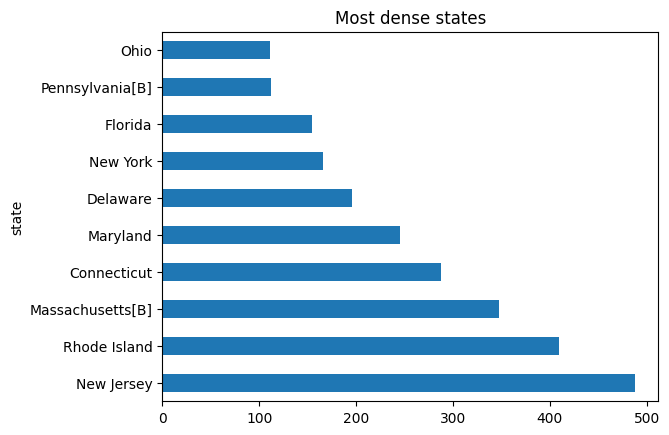

In [31]:
df.sort_values('density_land', ascending = False).head(10).plot(kind = 'barh', x = 'state', y = 'density_land', title = 'Most dense states', legend = False)

Make a column with the population density variable. This should account for land/water segmentation.

In [28]:
df.head()

,state,abrev,capital,largest,admission,population,total_mi2,total_km2,land_mi2,land_km2,water_mi2,water_km2,representitives,date_rank,state_time_days,state_time_years,density_land
0,Alabama,AL,Montgomery,Huntsville,1819-12-14,5024279,52420,135767,50645,131171,1775,4597,7,22,74482,204.06,38.30
1,Alaska,AK,Juneau,Anchorage,1959-01-03,733391,665384,1723337,570641,1477953,94743,245384,1,49,23693,64.91,0.50
2,Arizona,AZ,Phoenix,Phoenix,1912-02-14,7151502,113990,295234,113594,294207,396,1026,9,48,40818,111.83,24.31
3,Arkansas,AR,Little Rock,Little Rock,1836-06-15,3011524,53179,137732,52035,134771,1143,2961,4,25,68454,187.55,22.35
4,California,CA,Sacramento,Los Angeles,1850-09-09,39538223,163695,423967,155779,403466,7916,20501,52,31,63255,173.30,98.00


Clean the 'state' column from endnotes markers.